<a href="https://colab.research.google.com/github/amandasmagalhaes/data-science-flai/blob/main/M%C3%B3dulo%205.2%20-%20ML%20Problemas%20Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**  
## **Supervisionado** (quando temos a variável resposta)  
### **Váriavel resposta:**  
* Numérica (prever um número): regressão   
* Categóricas (prever uma classe): classificação  

&nbsp;

1. **MODELO para ajustar:**  
Regressão: Regressão Linear, KNN, Árvore de Decisão  
Classificação: Regressão Logística, KNN, Árvore de Decisão  

2. **MÉTRICA para otimizar:**  
Regressão: Erro quadrático médio  
Classificação: Estimação via Máxima Verossimilhança, Acúracia, Sensibilidade, VPP  

3.  **MÉTODO para validar:**  
Regressão: HoldOut, HoldOut Repetido  
Classificação: Validação Cruzada K-FOLD  

# **Combinação de Modelos**  

&nbsp;

**Objetivo:** Construir modelos simples, para então combiná-los e alcançar umr esultado final superior através da combinação desses modelos.

In [26]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [27]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

In [29]:
import seaborn as sns

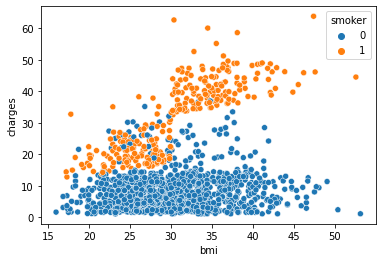

In [30]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

In [31]:
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

## **Validação Cruzada**

In [32]:
# Configuração da Validação Cruzada
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [39]:
kf = RepeatedKFold(n_splits = 10, n_repeats = 10)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [40]:
# Regressão Logistica

modelo = LogisticRegression() 
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean().round(3)

0.93

In [43]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25) 
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean().round(3)

0.96

In [44]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3) 
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean().round(3)

0.96

## Combinação por Votos

In [57]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean().round(3)

0.964

### **Combinação Hard**  

RL |KNN|ARV|VOTING-HARD|
:-:|:-:|:-:|:---------:|
1  |1  |0  |1          |
0  |1  |0  |0          |
0  |1  |1  |1          |
.  |.  |.  |.          |

### **Combinação Soft**  

RL  |KNN |ARV |VOTING-SOFT|
:--:|:--:|:-: |:---------:|
0.80|0.75|0.45|0.66 -> 1  |
0.01|0.66|0.30|0.32 -> 0  |
0.05|0.55|0.55|0.38 -> 0  |
.   |.   |.   |.          |

In [46]:
# Bibliotecas para o gráfico de região

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


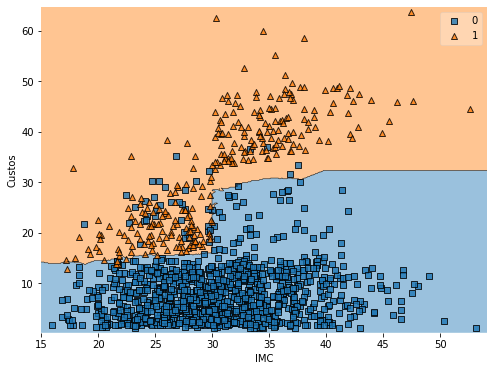

In [47]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
#plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod4))  
plt.show() 

In [56]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean().round(3)

0.965

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


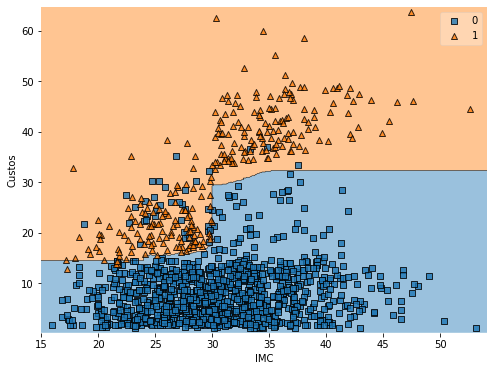

In [53]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
#plt.title('Acurácia Combinação de Modelos: {:.2f}%'.format(100*mod5))  
plt.show() 

## Bagging

&nbsp;

**Réplicas Bootstrap**  
* São amostragens de um conjunto de dados, com reposição, e, em geral, do mesmo tamanho do conjunto de dados.  
* Esse procesimento induz uma média de aproximadamente 63% de observações distintas do conjunto de dados original.  
* É como se fosse pesos associados aos elementos de um conjunto de dados.  


In [60]:
# Bagging
from sklearn.ensemble import BaggingClassifier

#modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 25)
modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 100, base_estimator = modelo_base) 
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean().round(3)

0.964

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


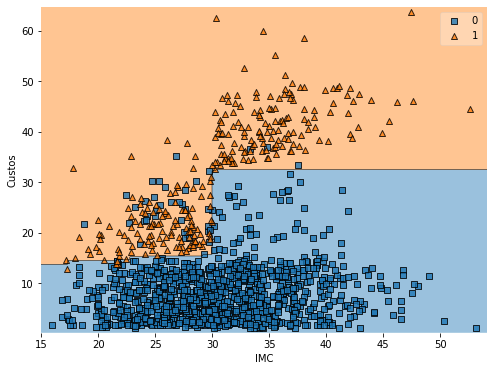

In [61]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
#plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod6))  
plt.show() 

## Random Forest (Florestas Aleatórias)

&nbsp;

É uma versão mais 'trabalhada' do bagging.  
**Método:** são criadas árvores em que as variáveis utilizadas na classificação são um subconjunto de todas as variáveis disponíveis.  
Em cada divisão de nó nas árvores geradas, um subconjunto diferente de variáveis é utilizado.  
O resultado final é a combinação da classificação apresentada por cada árvore da floresta.  
É um método bastante utilizado na prática, pois tem desempenho bom na maioria dos casos.  

&nbsp;

No RandomForest a definição desta variável não acontece com base em todas as variáveis disponíveis. O algoritmo irá escolher de maneira aleatória (random) duas ou mais variáveis, e então realizar os cálculos com base nas amostras selecionadas, para definir qual dessas variáveis será utilizada no primeiro nó. Para escolha da variável do próximo nó, novamente serão escolhidas duas (ou mais) variáveis, excluindo as já selecionadas anteriormente, e o processo de escolha se repetirá. Desta forma a árvore será construída até o último nó. A quantidade de variáveis a serem escolhidas pode ser definida na criação do modelo.

In [62]:
from sklearn.ensemble import RandomForestClassifier
 
modelo = RandomForestClassifier(n_estimators = 100, max_depth = 5)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean().round(3)

0.963

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


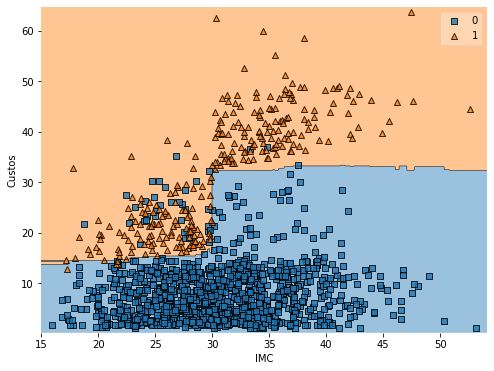

In [63]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
#plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*mod7))  
plt.show() 

## Mais métricas de Classificação

### **Métricas para classificação binária**  

Matriz de confusão (preditos x observados)  

*   #### **Acurácia:** também chamado de **taxa de acerto**
Acurácia = [(VN + VP) / (VN + VP + FN + FP)]  

*   #### **Sensibilidade:** também chamada de recall, taxa de verdadeiro positivos
Sensibilidade = [(VP) / (VP + FN)]  

*   #### **Especificidade:** também chamada de seletividade, taxa de verdadeiro negativos
Especificidade = [(VN) / (VN + FP)]  

*   #### **Valor Preditivo Positivo:** também chamada de **precisão**
VPP = [(VP) / (VP + FP)]  
O quanto meu modelo é preciso  

*   #### **Valor Preditivo Negativo**
VPN = [(VN) / (VN + FN)]  

*   #### **Coeficiente de Correlação de Matthews**
MCC = [(VP * VN - FP * FN) / (VP + FP) * (VP + FN) * (VN + FP) * (VN + FN)]**1/2  

*   #### **Eficiência:** também chamada de **acurácia balanceada**
Eficiência = [Sensibilidade + Especificidade / 2]  

*   #### **F1-Score:** É a média harmônica entre Sensibilidade e Valor Preditivo Positivo
F1-Score = [2 * Sensibilidade * VPP / Sensibilidade + VPP]  

## Validação do Modelo - Quero apenas escolher o melhor modelo ou também saber o seu erro de generalização?

In [77]:
from sklearn.metrics import confusion_matrix
import numpy as np
mc = confusion_matrix(y, preditos)
mc

array([[1029,   35],
       [  54,  220]])

In [78]:
def MetricasClassBinaria(observado, predito):
    from sklearn.metrics import confusion_matrix
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 
    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}
 
    return metricas

In [82]:
modelo = LogisticRegression()
modelo.fit(X, y)
preditos = modelo.predict(X)
m = MetricasClassBinaria(y, preditos)

  Prevalência de Positivos: 0.2048
                  Acurácia: 0.9335
             Sensibilidade: 0.8029
            Especificidade: 0.9671
  Valor Preditivo Positivo: 0.8627
  Valor Preditivo Negativo: 0.9501
Coef. de Corr. de Matthews: 0.7912
                  F1-Score: 0.8318
                Eficiência: 0.8850


In [83]:
modelo = VotingClassifier(modelos, voting = 'soft')
modelo.fit(X, y)
preditos = modelo.predict(X)
m = MetricasClassBinaria(y, preditos)

  Prevalência de Positivos: 0.2048
                  Acurácia: 0.9686
             Sensibilidade: 0.9818
            Especificidade: 0.9652
  Valor Preditivo Positivo: 0.8791
  Valor Preditivo Negativo: 0.9952
Coef. de Corr. de Matthews: 0.9099
                  F1-Score: 0.9276
                Eficiência: 0.9735


In [ ]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas3 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.1978
                  Acurácia: 0.9627
             Sensibilidade: 0.9811
            Especificidade: 0.9581
  Valor Preditivo Positivo: 0.8525
  Valor Preditivo Negativo: 0.9952
Coef. de Corr. de Matthews: 0.8923
                  F1-Score: 0.9123
                Eficiência: 0.9696
